# Roller Coaster

### Project Goals

### Project Requirements

In [2]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt

# Load databases
df_wood = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
df_steel = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
df_coasters = pd.read_csv("roller_coasters.csv")

# Concatenate winners databases
df_full = pd.concat([df_wood, df_steel]).reset_index()
print(df_full.head())

   index  Rank          Name                       Park             Location  \
0      0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1      1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2      2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3      3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4      4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


In [3]:
# Clean data with replacement in names
names_replace = [
    ("Grizzly \(KD\)", "Grizzly"),
    ("Intimidator-305", "Intimidator 305"),
    ("Superman: The Ride", "Superman The Ride"),
    ("^The ", "")]
# Clean data with replacement in parks
parks_replace = [
    ("Conneaut Lake Park", "Conneaut Lake"),
    ("Luna Park/Coney Island", "Luna Park"),
    ("Califoria’s Great America", "California’s Great America"),
    ("Mt. Olympus Theme Park", "Mount Olympus"),
    ("Oakwood Leisure Park", "Oakwood"),
    ("PNE Playland", "Playland"),
    ("ZDTs", "ZDT’s"),
    ("Fun Spot America", "Fun Spot")]

# Perform replacement with for loop
for i in names_replace:
    df_full["Name"] = df_full["Name"].str.replace(i[0], i[1])
for i in parks_replace:
    df_full["Park"] = df_full["Park"].str.replace(i[0], i[1])

/var/folders/pv/6d4r18fx6fqd4_ln0m25kdlh0000gn/T/ipykernel_10945/1872210186.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df_full["Name"] = df_full["Name"].str.replace(i[0], i[1])
/var/folders/pv/6d4r18fx6fqd4_ln0m25kdlh0000gn/T/ipykernel_10945/1872210186.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df_full["Park"] = df_full["Park"].str.replace(i[0], i[1])


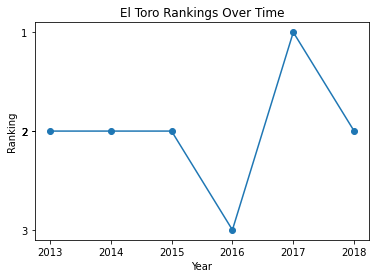

In [4]:
# Create a function to plot ranking over time for 1 roller coaster
def plot_ranking(name, park_name, df):
  # Create a subplot for visualization manipulations
  ax = plt.subplot()
  # Select ranking and differentiate between roller coasters of the same name at different parks
  selected_rollercoaster = df[(df["Name"] == name) & (df["Park"] == park_name)]
  # Define x & y values
  years = selected_rollercoaster["Year of Rank"]
  ranks = selected_rollercoaster["Rank"]
  # Plot the selected coaster
  ax.plot(years, ranks, marker="o")
  # Set x & y ticks
  ax.set_xticks(years)
  ax.set_yticks(ranks)
  # Invert y-axis
  ax.invert_yaxis()
  # Give labels
  plt.title("{} Rankings Over Time".format(name))
  plt.xlabel("Year")
  plt.ylabel("Ranking")
  plt.show()
# Call a plot of Boulder Dash ranking over time
plot_ranking("El Toro", "Six Flags Great Adventure", df_full)


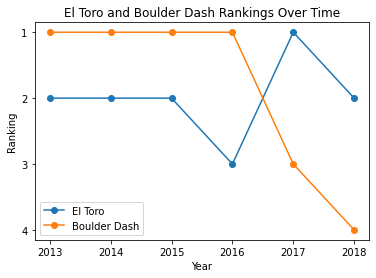

In [5]:

# Create a function to plot rankings over time for 2 roller coaster
def plot_two_rankings(names, df):
  # Create a subplot for visualization manipulations
  ax = plt.subplot()
  # Create empty sets for unique and immutable collections
  years = set()
  ranks = set()
  # Add for loop to collect and plot all appropriate cases
  for name, park_name in names:
    # Select rankings and differentiate between roller coasters of the same name at different parks
    two_rollercoasters = df[(df["Name"] == name) & (df["Park"] == park_name)]
    # Define x & y values and add them to the empty sets
    year = two_rollercoasters["Year of Rank"]
    years.update(year)
    rank = two_rollercoasters["Rank"]
    ranks.update(rank)
    # Plot the selected coasters
    ax.plot(year, rank, marker="o", label=name)
  # Set x & y ticks
  ax.set_xticks(sorted(years))
  ax.set_yticks(sorted(ranks))
  # Invert y-axis
  ax.invert_yaxis()
  # Give labels
  plt.title("{} and {} Rankings Over Time".format(names[0][0], names[1][0]))
  plt.xlabel("Year")
  plt.ylabel("Ranking")
  plt.legend()
  plt.show()
# Call a plot of Boulder Dash rankings over time
plot_two_rankings([("El Toro", "Six Flags Great Adventure"), ("Boulder Dash", "Lake Compounce")], df_full)

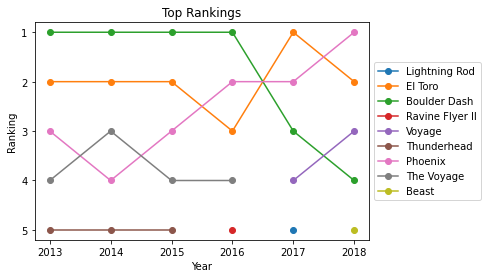

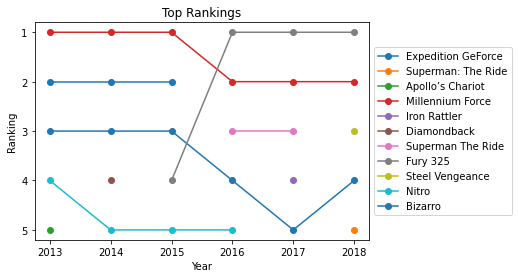

In [19]:
# Create a function to plot top n rankings over time
def plot_top_rankings(n, df):
  # Create a subplot for visualization manipulations
  ax = plt.subplot()
  # Select rankings equal to or less than n value
  top_n_rankings = df[df["Rank"] <= n]
  # Add for loop to plot each selected case
  for coaster in set(top_n_rankings["Name"]):
    # Differentiate between roller coasters and give a label
    coaster_rankings = top_n_rankings[top_n_rankings["Name"] == coaster]
    # Plot the selected coaster
    ax.plot(coaster_rankings["Year of Rank"], coaster_rankings["Rank"], label=coaster, marker="o")
  # Set ticks
  ax.set_yticks([i for i in range(1,6)])
  # Invert y-axis
  ax.invert_yaxis()
  # Give labels
  plt.title("Top Rankings")
  plt.xlabel("Year")
  plt.ylabel("Ranking")
  plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
  plt.show()

# Create a plot of top n rankings over time
plot_top_rankings(5, df_wood)
plot_top_rankings(5, df_steel)

   5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [ ]:
# 5
# load roller coaster data


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

In [ ]:
# 6
# Create a function to plot histogram of column values

# Create histogram of roller coaster speed

# Create histogram of roller coaster length

# Create histogram of roller coaster number of inversions

# Create a function to plot histogram of height values

# Create a histogram of roller coaster height


7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

In [ ]:
# 7
# Create a function to plot inversions by coaster at park

# Create barplot of inversions by roller coasters


8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

In [ ]:
# 8
# Create a function to plot a pie chart of status.operating

# Create pie chart of roller coasters


9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

In [ ]:
# 9
# Create a function to plot scatter of any two columns

# Create a function to plot scatter of speed vs height

# Create a scatter plot of roller coaster height by speed


10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.